# Comparison of performance between graphs on multiple prediction tasks

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import join
from sklearn.metrics import accuracy_score

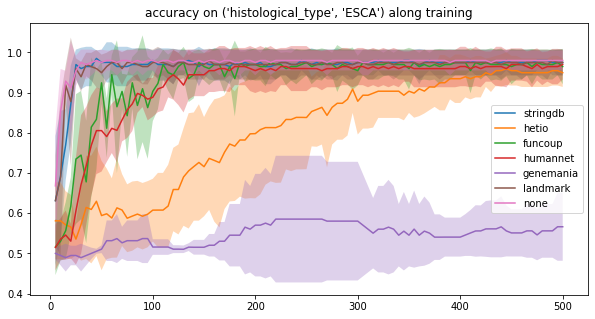

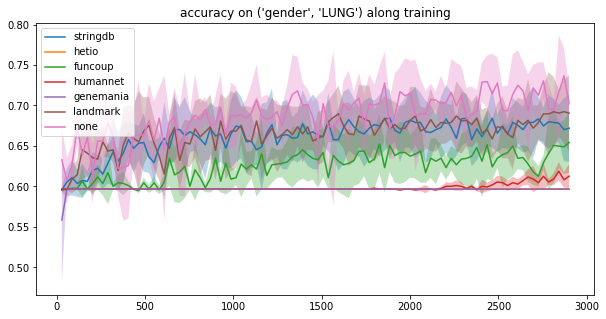

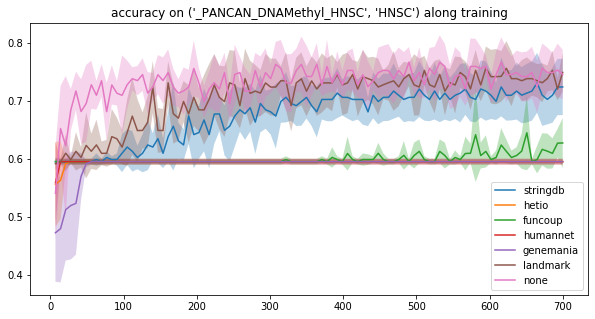

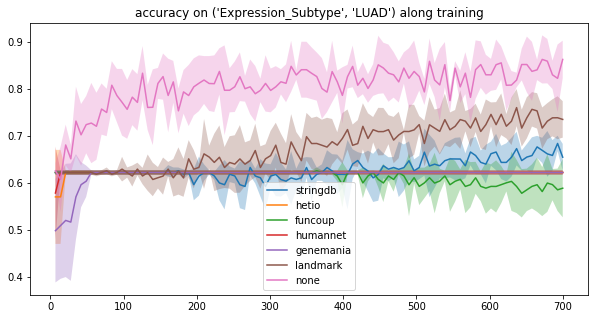

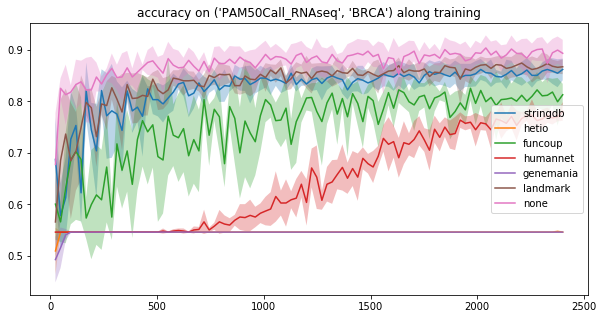

In [55]:
for task_id in range(1, 6):
    task_names = ["('histological_type', 'ESCA')","('gender', 'LUNG')","('_PANCAN_DNAMethyl_HNSC', 'HNSC')", 
                  "('Expression_Subtype', 'LUAD')", "('PAM50Call_RNAseq', 'BRCA')"]
    mypath = "/Users/paul/PycharmProjects/gene-graph-analysis/results/prediction_pipeline_losses" + str(task_id)
    graph_name_list = ["stringdb", "hetio", "funcoup", "humannet", "genemania", "landmark", "none"]
    n_folds = 5
    test_pred_dict = {}
    train_loss_dict = {}
    test_loss_dict = {}

    dict_list = [train_loss_dict, test_loss_dict, test_pred_dict]
    filetype_list = ["train_loss_list_", "test_loss_list_", "test_pred_list_"]
    for graph_name in graph_name_list:
        for dict, filetype in zip(dict_list, filetype_list):
            L = []
            for fold in range(1, n_folds+1):
                L.append(np.load(join(mypath, filetype + graph_name + "_" + str(fold) +".npy"), allow_pickle=True))
            dict[graph_name] = L
    grasph_name = graph_name_list[0]
    fold = 0
    epoch = -1
    plt.figure(figsize=(10,5))
    n_epochs = len(test_pred_dict[graph_name][fold])
    for graph_name in graph_name_list:
        test_acc_list = []
        for fold in range(n_folds):
            test_acc_fold_list = []
            for epoch in range(n_epochs):
                example = test_pred_dict[graph_name][fold][epoch]
                test_acc_fold_list.append((example[0], accuracy_score(example[1], example[2] > 0)))
            test_acc_list.append(test_acc_fold_list)
        test_acc_mean_list = np.mean(test_acc_list, axis=0)
        test_acc_std_list = np.std(test_acc_list, axis=0)
        plt.plot(test_acc_mean_list[:, 0], test_acc_mean_list[:, 1], label=graph_name)
        plt.fill_between(test_acc_mean_list[:, 0], test_acc_mean_list[:, 1] - test_acc_std_list[:, 1], 
                        test_acc_mean_list[:, 1] + test_acc_std_list[:, 1], alpha=0.3)
    plt.title("accuracy on " + task_names[task_id - 1] + " along training")
    plt.legend()
    plt.show()